# Business Problem

1. **Objective**
   - To assess if a customer's license should be issued(AAI), renewed(REV) or cancelled(AAC) depending on various parameters
   - Learn from various features of applications rejected or given in the past to come up with a decision


2. **Machine Learning Problem**
   - Develop a machine learning model to learn relation of the target variable with the set of features available from the training data


3. **Technology**
   - Python, h2O, Scikit-learn, tensorflow, keras, Pandas, Numpy
   

4. **Decision making**
   - Select the best model which performs the best w.r.t better accuracy
   - Metrics: Accuracy
   

5. **Deployment**
   - Deploy model in a scalable way so that business decisions can be taken in near real time in assessing a customer's loan worthiness



**Features**<br>
ID<br>
LICENSE_ID<br>
ACCOUNT_NUMBER<br>
SITE_NUMBER<br>
LEGAL_NAME<br>
DOING_BUSINESS_AS_NAME<br>
ADDRESS<br>
CITY<br>
STATE<br>
ZIP_CODE<br>
WARD<br>
PRECINCT<br>
WARD_PRECINCT<br>
POLICE_DISTRICT<br>
LICENSE_CODE<br>
LICENSE_DESCRIPTION<br>
LICENSE_NUMBER<br>
APPLICATION_TYPE<br>
APPLICATION_CREATED_DATE<br>
APPLICATION_REQUIREMENTS_COMPLETE<br>
PAYMENT_DATE<br>
CONDITIONAL_APPROVAL<br>
LICENSE_TERM_START_DATE<br>
LICENSE_TERM_EXPIRATION_DATE<br>
LICENSE_APPROVED_FOR_ISSUANCE<br>
DATE_ISSUED<br>
LICENSE_STATUS_CHANGE_DATE<br>
SSA<br>
LATITUDE<br>
LONGITUDE<br>
LOCATION<br>
LICENSE_STATUS


In [1]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.401-b10, mixed mode, sharing)
  Starting server from D:\PROJECTS\deep_learning_project_for_beginners\env2\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\vithi\AppData\Local\Temp\tmp8rxzbh_3
  JVM stdout: C:\Users\vithi\AppData\Local\Temp\tmp8rxzbh_3\h2o_vithi_started_from_python.out
  JVM stderr: C:\Users\vithi\AppData\Local\Temp\tmp8rxzbh_3\h2o_vithi_started_from_python.err


d:\PROJECTS\deep_learning_project_for_beginners\env2\lib\site-packages\h2o\backend\server.py:395: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_vithi_we1mih
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [6]:
pdf = pd.read_csv("input/License_Data.csv")
print(pdf.shape)

(85895, 32)


d:\PROJECTS\deep_learning_project_for_beginners\env2\lib\site-packages\IPython\core\interactiveshell.py:3508: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
pdf.LICENSE_STATUS.value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE_STATUS, dtype: int64

In [8]:
pdf = pdf[pdf.LICENSE_STATUS.isin(['AAI', 'AAC', 'REV'])]

In [9]:
pdf.isna().sum()

ID                                       0
LICENSE_ID                               0
ACCOUNT_NUMBER                           0
SITE_NUMBER                              0
LEGAL_NAME                               0
DOING_BUSINESS_AS_NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP_CODE                                31
WARD                                 49699
PRECINCT                             56699
WARD_PRECINCT                        49698
POLICE_DISTRICT                      54010
LICENSE_CODE                             0
LICENSE_DESCRIPTION                      0
LICENSE_NUMBER                           1
APPLICATION_TYPE                         0
APPLICATION_CREATED_DATE             64657
APPLICATION_REQUIREMENTS_COMPLETE      214
PAYMENT_DATE                          1287
CONDITIONAL_APPROVAL                     0
LICENSE_TERM_START_DATE                228
LICENSE_TER

In [10]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85890 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85890 non-null  object 
 1   LICENSE_ID                         85890 non-null  int64  
 2   ACCOUNT_NUMBER                     85890 non-null  int64  
 3   SITE_NUMBER                        85890 non-null  int64  
 4   LEGAL_NAME                         85890 non-null  object 
 5   DOING_BUSINESS_AS_NAME             85889 non-null  object 
 6   ADDRESS                            85890 non-null  object 
 7   CITY                               85890 non-null  object 
 8   STATE                              85890 non-null  object 
 9   ZIP_CODE                           85859 non-null  object 
 10  WARD                               36191 non-null  float64
 11  PRECINCT                           29191 non-null  flo

In [11]:
pdf.nunique()

ID                                   85890
LICENSE_ID                           85890
ACCOUNT_NUMBER                       38895
SITE_NUMBER                            177
LEGAL_NAME                           38742
DOING_BUSINESS_AS_NAME               41684
ADDRESS                              42143
CITY                                  1223
STATE                                   54
ZIP_CODE                              2456
WARD                                    50
PRECINCT                                76
WARD_PRECINCT                         2383
POLICE_DISTRICT                         28
LICENSE_CODE                           106
LICENSE_DESCRIPTION                    106
LICENSE_NUMBER                       49764
APPLICATION_TYPE                         5
APPLICATION_CREATED_DATE              2899
APPLICATION_REQUIREMENTS_COMPLETE     3078
PAYMENT_DATE                          4356
CONDITIONAL_APPROVAL                     2
LICENSE_TERM_START_DATE               2825
LICENSE_TER

In [12]:
pdf.head()

,ID,LICENSE_ID,ACCOUNT_NUMBER,SITE_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,LICENSE_NUMBER,APPLICATION_TYPE,APPLICATION_CREATED_DATE,APPLICATION_REQUIREMENTS_COMPLETE,PAYMENT_DATE,CONDITIONAL_APPROVAL,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_APPROVED_FOR_ISSUANCE,DATE_ISSUED,LICENSE_STATUS_CHANGE_DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE_STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


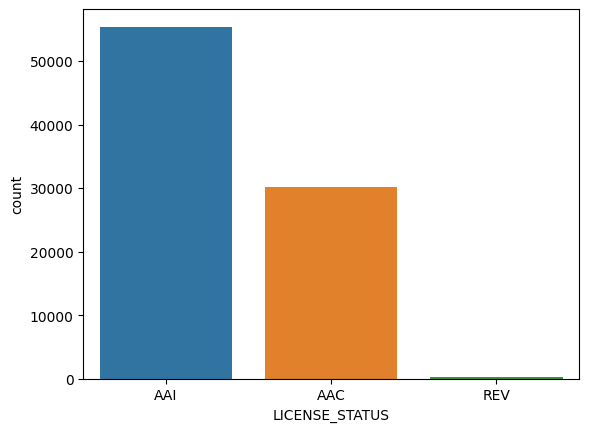

In [18]:
sns.countplot(data=pdf, x='LICENSE_STATUS')
plt.show()

In [19]:
pdf.CONDITIONAL_APPROVAL.value_counts()

N    85872
Y       18
Name: CONDITIONAL_APPROVAL, dtype: int64

In [20]:
pdf['LEGAL_BUSINESS_NAME_MATCH'] = pdf.apply(lambda x: 1 if str(x['LEGAL_NAME'].upper()) in str(x['DOING_BUSINESS_AS_NAME']) .upper()
                                             or str(x['DOING_BUSINESS_AS_NAME']).upper() in str(x['LEGAL_NAME']).upper() else 0, 
                                             axis=1)

In [21]:
pdf['LICENSE_DESCRIPTION'].value_counts()

Limited Business License                                        50077
Home Repair                                                     10632
Peddler, non-food                                                2812
Home Occupation                                                  2809
Retail Food Establishment                                        2320
Massage Therapist                                                1952
Street Performer                                                 1889
Scavenger, Private                                               1549
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Motor Vehicle Repair : Engine Only (Class II)                     931
Automatic Amusement Device Operator                               773
Peddler, food (fruits and vegtables only)                         582
Mobile Food Dispenser                                             525
Manufacturing Establ

In [22]:
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
pdf['LICENSE_DESCRIPTION'] = pdf['LICENSE_DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [23]:
pdf['LICENSE_DESCRIPTION'].nunique()

92

In [24]:
pdf['LEGAL_NAME'] = pdf['LEGAL_NAME'].str.replace('.', '', regex=False)
pdf['DOING_BUSINESS_AS_NAME'] = pdf['DOING_BUSINESS_AS_NAME'].str.replace('.', '', regex=False)

pdf['BUSINESS_TYPE'] = 'PVT'

pdf['BUSINESS_TYPE'] = np.where(pdf['LEGAL_NAME'].str.contains('INC'), 'INC', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['LEGAL_NAME'].str.contains('INCORPORATED'), 'INC', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['DOING_BUSINESS_AS_NAME'].str.contains('INC'), 'INC', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['DOING_BUSINESS_AS_NAME'].str.contains('INCORPORATED'), 'INC', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['LEGAL_NAME'].str.contains('LLC'), 'LLC', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['DOING_BUSINESS_AS_NAME'].str.contains('LLC'), 'LLC', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['LEGAL_NAME'].str.contains('CO'), 'CORP', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['LEGAL_NAME'].str.contains('CORP'), 'CORP', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['LEGAL_NAME'].str.contains('CORPORATION'), 'CORP', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['DOING_BUSINESS_AS_NAME'].str.contains('CO'), 'CORP', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['DOING_BUSINESS_AS_NAME'].str.contains('CORP'), 'CORP', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['DOING_BUSINESS_AS_NAME'].str.contains('CORPORATION'), 'CORP', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['LEGAL_NAME'].str.contains('LTD'), 'LTD', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['LEGAL_NAME'].str.contains('LIMITED'), 'LTD', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['DOING_BUSINESS_AS_NAME'].str.contains('LTD'), 'LTD', pdf['BUSINESS_TYPE'])
pdf['BUSINESS_TYPE'] = np.where(pdf['DOING_BUSINESS_AS_NAME'].str.contains('LIMITED'), 'LTD', pdf['BUSINESS_TYPE'])

In [25]:
pdf['BUSINESS_TYPE'].value_counts()

CORP    27763
PVT     27020
INC     24443
LLC      5048
LTD      1616
Name: BUSINESS_TYPE, dtype: int64

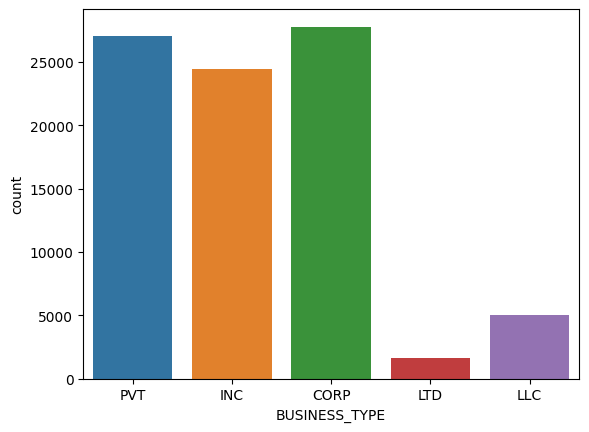

In [26]:
sns.countplot(data = pdf, x ='BUSINESS_TYPE')
plt.show()

In [27]:
pdf.ZIP_CODE.value_counts()

60804      1142
60647.0     925
60618       889
60639       878
60007       789
           ... 
90605         1
57108         1
52358         1
16801         1
61115.0       1
Name: ZIP_CODE, Length: 2456, dtype: int64

In [28]:
pdf['ZIP_CODE'].fillna(-1, inplace=True)
pdf['ZIP_CODE_MISSING'] = pdf.apply(lambda x: 1 if x['ZIP_CODE'] == -1 else 0, axis=1)

<AxesSubplot: ylabel='Frequency'>

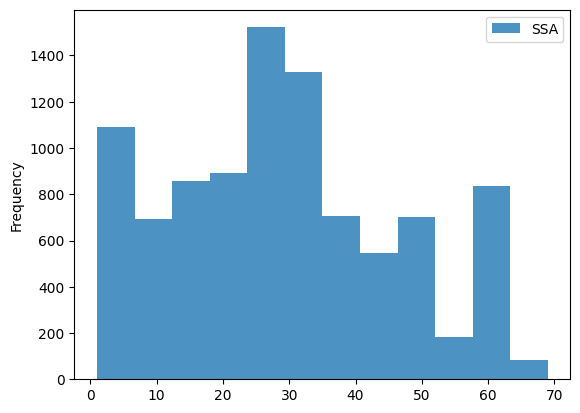

In [29]:
pdf[['SSA']].plot.hist(bins=12, alpha=0.8)

In [30]:
pdf['SSA'].fillna(-1, inplace=True)

In [31]:
pdf['APPLICATION_REQUIREMENTS_COMPLETE'].fillna(-1, inplace=True)
pdf['APPLICATION_REQUIREMENTS_COMPLETE'] = pdf.apply(lambda x: 0 if x['APPLICATION_REQUIREMENTS_COMPLETE'] == -1 
                                                     else 1, axis=1)

# Train Test Split

In [32]:
train, test = train_test_split(pdf, test_size=0.2, random_state=123)

In [33]:
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [34]:
h2o_rf = H2ORandomForestEstimator(ntrees=100, seed=123, max_depth=10)
h2o_rf.train(x=['APPLICATION_TYPE', 'CONDITIONAL_APPROVAL', 'LICENSE_CODE', 'SSA', 'LEGAL_BUSINESS_NAME_MATCH', 
                'ZIP_CODE_MISSING', 'SSA', 'APPLICATION_REQUIREMENTS_COMPLETE', 'LICENSE_DESCRIPTION', 'BUSINESS_TYPE'], 
             y='LICENSE_STATUS', training_frame=train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1710921393376_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                300                         1.28941e+06            10           10           10            52            449           272.18

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.15953097856719536
RMSE: 0.39941329292750805
LogLoss: 0.4956308711207332
Mean Per-Class Error: 0.5010083289322868
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
AAC    AAI    REV    Error      Rate
-----  -----  -----  ---------  ---------------
12233  11861  18     0.492659   11,879 / 24,112
2847   41529  1      0.0641774  2,848 / 44,377
175    36     12     0.946188   211 / 223
15255  53426  31     0.2174     14,938 / 68,712

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.7826
2    0.99904
3    1

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_logloss     training_classification_error    training_auc    training_pr_auc
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------------------  --------------  -----------------
     2024-03-20 13:32:32  0.026 sec   0.0                nan                  nan                  nan                              nan             nan
     2024-03-20 13:32:33  0.298 sec   1.0                0.4033043376531084   0.6380514924992176   0.22050373868555687              nan             nan
     2024-03-20 13:32:33  0.445 sec   2.0                0.4037497924867728   0.6182224014007817   0.22058574572541054              nan             nan
     2024-03-20 13:32:33  0.505 sec   3.0                0.4031604556179315   0.6128207064024612   0.21938894958638988              nan             nan
     2024-03-20 13:32:33  0.563 sec   4.0                0.40217194327647576  0.5879616334847267   0.21865337178195463              nan             nan
     2024-03-20 13:32:33  0.629 sec   5.0                0.40134309872946383  0.5739521212392932   0.21788652183083737              nan             nan
     2024-03-20 13:32:33  0.703 sec   6.0                0.40090045449379463  0.5606789607585659   0.21758985069043982              nan             nan
     2024-03-20 13:32:33  0.777 sec   7.0                0.40063247071446206  0.5465366899115163   0.21729163503871263              nan             nan
     2024-03-20 13:32:33  0.850 sec   8.0                0.40055466254170197  0.5382016155536226   0.21717730835976304              nan             nan
     2024-03-20 13:32:33  0.921 sec   9.0                0.40046409216836043  0.535676674349554    0.21717851281217193              nan             nan
---  ---                  ---         ---                ---                  ---                  ---                              ---             ---
     2024-03-20 13:32:36  3.528 sec   48.0               0.3995412263248394   0.49840863136241303  0.21729828850855745              nan             nan
     2024-03-20 13:32:36  3.595 sec   49.0               0.39952771300897294  0.4983686070410942   0.21728373500989637              nan             nan
     2024-03-20 13:32:36  3.658 sec   50.0               0.3995176538906536   0.49836769112742957  0.21741471649784608            

In [35]:
predictions = h2o_rf.predict(test)
predictions['actual'] = test['LICENSE_STATUS']
predictions = predictions.as_data_frame()

drf prediction progress: |

███████████████████████████████████████████████████████| (done) 100%


d:\PROJECTS\deep_learning_project_for_beginners\env2\lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'LICENSE_DESCRIPTION' has levels not trained on: ["Not-For-Profit Club"]
  warnings.warn(w)
d:\PROJECTS\deep_learning_project_for_beginners\env2\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [36]:
predictions.head()

,predict,AAC,AAI,REV,actual
0,AAI,0.117295,0.882475,0.000230,AAI
1,AAC,0.744077,0.255458,0.000465,AAC
2,AAI,0.188198,0.810578,0.001225,AAI
3,AAC,0.911548,0.088198,0.000254,AAC
4,AAI,0.264562,0.735316,0.000121,AAI


In [37]:
accuracy = (predictions[predictions.actual == predictions.predict].shape[0])* 100.0 / predictions.shape[0]

In [38]:
accuracy

78.3152869949936

# Data Conversion for DNN model

In [39]:
predictors = ['APPLICATION_TYPE', 'CONDITIONAL_APPROVAL', 'LICENSE_CODE', 'SSA', 'LEGAL_BUSINESS_NAME_MATCH', 
                'ZIP_CODE_MISSING', 'SSA', 'APPLICATION_REQUIREMENTS_COMPLETE', 'LICENSE_DESCRIPTION', 'BUSINESS_TYPE']

target = ["LICENSE_STATUS_AAC", "LICENSE_STATUS_AAI", "LICENSE_STATUS_REV"]

In [40]:
pdf[predictors].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85890 entries, 0 to 85894
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   APPLICATION_TYPE                   85890 non-null  object 
 1   CONDITIONAL_APPROVAL               85890 non-null  object 
 2   LICENSE_CODE                       85890 non-null  int64  
 3   SSA                                85890 non-null  float64
 4   LEGAL_BUSINESS_NAME_MATCH          85890 non-null  int64  
 5   ZIP_CODE_MISSING                   85890 non-null  int64  
 6   SSA                                85890 non-null  float64
 7   APPLICATION_REQUIREMENTS_COMPLETE  85890 non-null  int64  
 8   LICENSE_DESCRIPTION                85890 non-null  object 
 9   BUSINESS_TYPE                      85890 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 9.2+ MB


In [41]:
final_df = pdf[predictors + ["LICENSE_STATUS"]]
final_df = pd.get_dummies(final_df, columns=['APPLICATION_TYPE', 'CONDITIONAL_APPROVAL', 'LICENSE_CODE', 'LICENSE_DESCRIPTION', 'BUSINESS_TYPE', 'LICENSE_STATUS'])

In [42]:
final_df.columns

Index(['SSA', 'LEGAL_BUSINESS_NAME_MATCH', 'ZIP_CODE_MISSING', 'SSA',
       'APPLICATION_REQUIREMENTS_COMPLETE', 'APPLICATION_TYPE_C_CAPA',
       'APPLICATION_TYPE_C_EXPA', 'APPLICATION_TYPE_C_LOC',
       'APPLICATION_TYPE_ISSUE', 'APPLICATION_TYPE_RENEW',
       ...
       'LICENSE_DESCRIPTION_Wholesale Food Establishment',
       'LICENSE_DESCRIPTION_Wrigley Field', 'BUSINESS_TYPE_CORP',
       'BUSINESS_TYPE_INC', 'BUSINESS_TYPE_LLC', 'BUSINESS_TYPE_LTD',
       'BUSINESS_TYPE_PVT', 'LICENSE_STATUS_AAC', 'LICENSE_STATUS_AAI',
       'LICENSE_STATUS_REV'],
      dtype='object', length=218)

In [43]:
train, test = train_test_split(final_df, test_size=0.2, random_state=123)

X_train = train.drop(target, axis=1).values
y_train = train[target].values

X_test = test.drop(target, axis=1).values
y_test = test[target].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(68712, 215) (68712, 3) (17178, 215) (17178, 3)


In [44]:
train.head()

,SSA,LEGAL_BUSINESS_NAME_MATCH,ZIP_CODE_MISSING,SSA,APPLICATION_REQUIREMENTS_COMPLETE,APPLICATION_TYPE_C_CAPA,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW,CONDITIONAL_APPROVAL_N,CONDITIONAL_APPROVAL_Y,LICENSE_CODE_1002,LICENSE_CODE_1004,LICENSE_CODE_1005,LICENSE_CODE_1006,LICENSE_CODE_1007,LICENSE_CODE_1008,LICENSE_CODE_1009,LICENSE_CODE_1010,LICENSE_CODE_1011,LICENSE_CODE_1012,LICENSE_CODE_1013,LICENSE_CODE_1014,LICENSE_CODE_1016,LICENSE_CODE_1020,LICENSE_CODE_1030,LICENSE_CODE_1032,LICENSE_CODE_1039,LICENSE_CODE_1046,LICENSE_CODE_1049,LICENSE_CODE_1050,LICENSE_CODE_1053,LICENSE_CODE_1054,LICENSE_CODE_1055,LICENSE_CODE_1056,LICENSE_CODE_1058,LICENSE_CODE_1059,LICENSE_CODE_1060,LICENSE_CODE_1061,LICENSE_CODE_1062,LICENSE_CODE_1063,LICENSE_CODE_1064,LICENSE_CODE_1070,LICENSE_CODE_1133,LICENSE_CODE_1253,LICENSE_CODE_1255,LICENSE_CODE_1275,LICENSE_CODE_1315,LICENSE_CODE_1316,LICENSE_CODE_1370,LICENSE_CODE_1371,LICENSE_CODE_1372,LICENSE_CODE_1374,LICENSE_CODE_1375,LICENSE_CODE_1431,LICENSE_CODE_1456,LICENSE_CODE_1470,LICENSE_CODE_1471,LICENSE_CODE_1472,LICENSE_CODE_1473,LICENSE_CODE_1474,LICENSE_CODE_1475,LICENSE_CODE_1477,LICENSE_CODE_1478,LICENSE_CODE_1479,LICENSE_CODE_1480,LICENSE_CODE_1481,LICENSE_CODE_1482,LICENSE_CODE_1483,LICENSE_CODE_1505,LICENSE_CODE_1524,LICENSE_CODE_1525,LICENSE_CODE_1550,LICENSE_CODE_1568,LICENSE_CODE_1569,LICENSE_CODE_1570,LICENSE_CODE_1571,LICENSE_CODE_1572,LICENSE_CODE_1573,LICENSE_CODE_1584,LICENSE_CODE_1585,LICENSE_CODE_1586,LICENSE_CODE_1587,LICENSE_CODE_1594,LICENSE_CODE_1603,LICENSE_CODE_1604,LICENSE_CODE_1605,LICENSE_CODE_1606,LICENSE_CODE_1607,LICENSE_CODE_1608,LICENSE_CODE_1609,LICENSE_CODE_1625,LICENSE_CODE_1676,LICENSE_CODE_1682,LICENSE_CODE_1684,LICENSE_CODE_1685,LICENSE_CODE_1686,LICENSE_CODE_1688,LICENSE_CODE_1690,LICENSE_CODE_1782,LICENSE_CODE_1783,LICENSE_CODE_1784,LICENSE_CODE_1786,LICENSE_CODE_1800,LICENSE_CODE_1833,LICENSE_CODE_1840,LICENSE_CODE_1841,LICENSE_CODE_1842,LICENSE_CODE_1900,LICENSE_CODE_1930,LICENSE_CODE_1931,LICENSE_CODE_1932,LICENSE_CODE_2101,LICENSE_CODE_4401,LICENSE_CODE_4404,LICENSE_CODE_8100,LICENSE_CODE_8340,LICENSE_DESCRIPTION_Accessory Garage,LICENSE_DESCRIPTION_Affiliation,LICENSE_DESCRIPTION_Airport Pushcart Liquor Midway - Class A,LICENSE_DESCRIPTION_Airport Pushcart Liquor O'Hare - Class A,LICENSE_DESCRIPTION_Animal Care Facility,LICENSE_DESCRIPTION_Animal Care License,LICENSE_DESCRIPTION_Animal Exhibition,LICENSE_DESCRIPTION_Assisted Living/Shared Housing Establishment,LICENSE_DESCRIPTION_Auctioneer,LICENSE_DESCRIPTION_Automatic Amusement Device Operator,LICENSE_DESCRIPTION_Bed-And-Breakfast Establishment,LICENSE_DESCRIPTION_Bicycle Messenger Service,LICENSE_DESCRIPTION_Board-Up Work,LICENSE_DESCRIPTION_Body Piercing,LICENSE_DESCRIPTION_Broker,LICENSE_DESCRIPTION_Caterer's Liquor License,LICENSE_DESCRIPTION_Caterer's Registration (Liquor),LICENSE_DESCRIPTION_Children's Activities Facilities,LICENSE_DESCRIPTION_Consumption on Premises - Incidental Activity,LICENSE_DESCRIPTION_Day Care Center,LICENSE_DESCRIPTION_Day Labor Agency,LICENSE_DESCRIPTION_Electronic Equipment Repair,LICENSE_DESCRIPTION_Expediter,LICENSE_DESCRIPTION_Explosives,"LICENSE_DESCRIPTION_Explosives, Certificate of Fitness",LICENSE_DESCRIPTION_Filling Station,LICENSE_DESCRIPTION_Grooming Facility,LICENSE_DESCRIPTION_Guard Dog Service,LICENSE_DESCRIPTION_Hazardous Materials,LICENSE_DESCRIPTION_Home Occupation,LICENSE_DESCRIPTION_Home Repair,LICENSE_DESCRIPTION_Hospital,LICENSE_DESCRIPTION_Hotel,LICENSE_DESCRIPTION_Humane Society,LICENSE_DESCRIPTION_Indoor Special Event,LICENSE_DESCRIPTION_Itinerant Merchant,LICENSE_DESCRIPTION_Junk Peddler,LICENSE_DESCRIPTION_Kennels and Catteries,LICENSE_DESCRIPTION_Laboratories,LICENSE_DESCRIPTION_Late Hour,"LICENSE_DESCRIPTION_Laundry, Late Hour",LICENSE_DESCRIPTION_Limited Business License,LICENSE_DESCRIPTION_Long-Term Care Facility,LICENSE_DESCRIPTION_Manufacturing Establishments,LICENSE_DESCRIPTION_Massag

# Modeling

In [45]:
from tensorflow import keras
from tensorflow.keras import layers

In [46]:
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(X_train.shape[1])),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="tanh"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="tanh"),
        layers.Dropout(0.2),
        layers.Dense(3, activation="softmax"),
    ]
)
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               27648     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

In [47]:
model.fit(X_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
1074/1074 [==============================] - 4s 3ms/step - loss: 0.5423 - accuracy: 0.7713
Epoch 2/20
1074/1074 [==============================] - 2s 2ms/step - loss: 0.5333 - accuracy: 0.7758
Epoch 3/20
1074/1074 [==============================] - 3s 3ms/step - loss: 0.5332 - accuracy: 0.7760
Epoch 4/20
1074/1074 [==============================] - 4s 4ms/step - loss: 0.5357 - accuracy: 0.7765
Epoch 5/20
1074/1074 [==============================] - 5s 4ms/step - loss: 0.5363 - accuracy: 0.7766
Epoch 6/20
1074/1074 [==============================] - 3s 3ms/step - loss: 0.5386 - accuracy: 0.7757
Epoch 7/20
1074/1074 [==============================] - 2s 2ms/step - loss: 0.5368 - accuracy: 0.7768
Epoch 8/20
1074/1074 [==============================] - 3s 2ms/step - loss: 0.5383 - accuracy: 0.7759
Epoch 9/20
1074/1074 [==============================] - 3s 3ms/step - loss: 0.5373 - accuracy: 0.7752
Epoch 10/20
1074/1074 [==============================] - 3s 3ms/step - loss: 0.534

In [53]:
model.evaluate(X_test, y_test)

537/537 [==============================] - 1s 794us/step - loss: 0.5163 - accuracy: 0.7794


[0.5162885189056396, 0.7793689370155334]

In [54]:
model.predict(X_test)

array([[1.3329527e-01, 8.6663026e-01, 7.4478630e-05],
       [8.0225343e-01, 1.9703689e-01, 7.0970180e-04],
       [1.5755571e-01, 8.4229761e-01, 1.4670400e-04],
       ...,
       [1.3329527e-01, 8.6663026e-01, 7.4478630e-05],
       [1.3329527e-01, 8.6663026e-01, 7.4478630e-05],
       [2.9981962e-01, 7.0006382e-01, 1.1656835e-04]], dtype=float32)